**Questions:**

*How many reads map to humans?*

336 of 1285441

*How many map to S. oneidensis?*

235465

*Do the reads cover the S. oneidensis genome uniformly?*

No

# Mapping Shewanella oneidensis to Human Genome

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter out Human Contamination

In [1]:
! bowtie2 -p 4 --very-fast --no-unal -x /data/references/hg19/hg19 -1 /data/Lab6_data/mixed_reads1.fastq -2 /data/Lab6_data/mixed_reads2.fastq -S human_filtered.sam --un-conc unaligned.fastq

1285441 reads; of these:
  1285441 (100.00%) were paired; of these:
    1285105 (99.97%) aligned concordantly 0 times
    114 (0.01%) aligned concordantly exactly 1 time
    222 (0.02%) aligned concordantly >1 times
    ----
    1285105 pairs aligned concordantly 0 times; of these:
      227762 (17.72%) aligned discordantly 1 time
    ----
    1057343 pairs aligned 0 times concordantly or discordantly; of these:
      2114686 mates make up the pairs; of these:
        2062758 (97.54%) aligned 0 times
        15162 (0.72%) aligned exactly 1 time
        36766 (1.74%) aligned >1 times
19.76% overall alignment rate


**What will you use for the database? Input reads?**

The database in this circumstance is the human genome.

**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?**

The unaligned.fastq contains the parts of the read that didn't align to the human genome, meaning that it contains the uncontaminated portion of the sequence. 

**What percentage of your sequencing library came from contaminating human DNA?**

19.76% came from contaminating human DNA because that is the percentage that aligned. 

# Align the reads to the bacterial genome

In [1]:
! bowtie2 -p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 /home/5372607/Lab6/unaligned.1.fastq -2 /home/5372607/Lab6/unaligned.2.fastq -S shewanella_aligned.sam --un-conc unaligned_shewanella.fastq

1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1049640 (81.68%) aligned concordantly 0 times
    220987 (17.20%) aligned concordantly exactly 1 time
    14478 (1.13%) aligned concordantly >1 times
    ----
    1049640 pairs aligned concordantly 0 times; of these:
      288853 (27.52%) aligned discordantly 1 time
    ----
    760787 pairs aligned 0 times concordantly or discordantly; of these:
      1521574 mates make up the pairs; of these:
        1245335 (81.85%) aligned 0 times
        221076 (14.53%) aligned exactly 1 time
        55163 (3.63%) aligned >1 times
51.55% overall alignment rate


In [2]:
! bowtie2 -p 4 --very-sensitive --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 /home/5372607/Lab6/unaligned.1.fastq -2 /home/5372607/Lab6/unaligned.2.fastq -S shewanella_aligned.sam --un-conc unaligned_shewanella.fastq

1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1048972 (81.63%) aligned concordantly 0 times
    221437 (17.23%) aligned concordantly exactly 1 time
    14696 (1.14%) aligned concordantly >1 times
    ----
    1048972 pairs aligned concordantly 0 times; of these:
      291246 (27.76%) aligned discordantly 1 time
    ----
    757726 pairs aligned 0 times concordantly or discordantly; of these:
      1515452 mates make up the pairs; of these:
        1238527 (81.73%) aligned 0 times
        220113 (14.52%) aligned exactly 1 time
        56812 (3.75%) aligned >1 times
51.81% overall alignment rate


**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?**

It will contain the parts of the DNA that are neither human nor from Shewanella oneidensis. 

**What percentage of your filtered library didn’t align to the reference genome?**

48.45% of my filtered library didn’t align to the reference genome.

**If you use --very-sensitive instead of --very-fast, does this percentage increase or decrease?**

Decreases

In [4]:
! samtools view -b shewanella_aligned.sam > shewanella_aligned.bam

[E::sam_parse1] SEQ and QUAL are of different length
[W::sam_read1] Parse error at line 1233921
[main_samview] truncated file.


In [5]:
! samtools sort shewanella_aligned.bam > shewanella_aligned.sorted.bam

In [6]:
! samtools index shewanella_aligned.sorted.bam

In [7]:
! samtools depth -a shewanella_aligned.sorted.bam > pileup.tab

In [9]:
data = pd.read_csv('pileup.tab', sep='\t', engine='python', header=None) # open the output file into a dataframe
data.head(5) # show the first 10 rows

,0,1,2
0,AE014299.2,1,1
1,AE014299.2,2,3
2,AE014299.2,3,4
3,AE014299.2,4,4
4,AE014299.2,5,4


**What is the min, max, and mean coverage across all positions?**

In [18]:
print("Min is: "  + str(data[2].min()))
print("Max is: "  + str(data[2].max()))
print("Mean is: " + str(data[2].mean()))

Min is: 1
Max is: 451
Mean is: 65.22398831201632


Text(0, 0.5, 'Depth of Coverage')

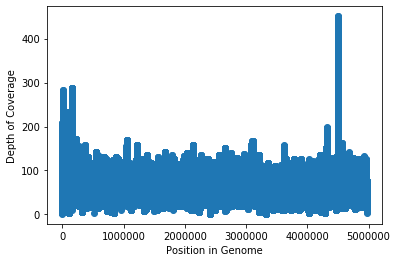

In [12]:
plt.scatter(x=data[1], y=data[2])
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')

Text(0, 0.5, 'Count')

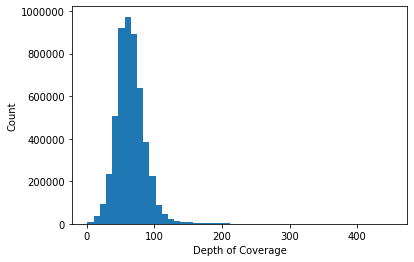

In [13]:
plt.hist(x=data[2], bins=np.linspace(data[2].min(), data[2].max()))
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

Extra Credit 1: Generate the same two plots using the SAM file you produced aligning the reads to the human reference genome. Instead of using “Position in Genome” (the plot on the left in red, above), plot the average depth (total depth / length of chromosome) for each human chromosome: chr1-22, X, and Y. What biological sex is Jamie? 

Extra Credit 2: Try to “zoom in” on regions that seem to have higher coverage than average. Can you figure out what genes are in those regions? You’ll have to extract the sequence from those regions and BLAST it. 